# Exploratory Data Analysis

Sau khi hoàn thành phần tiền xử lí dữ liệu, dữ liệu đã được làm sạch giúp ta trả lời một số câu hỏi chính xác và rõ ràng hơn.  
##### Đầu tiên, import các thư viện cần thiết

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##### Load data

In [18]:
steam_df = pd.read_csv('data/processed_data.csv')
steam_df

,Title,Genre,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,Rating
0,iRacing,"Massively Multiplayer, Racing, Simulation, Sports",0,0,iRacing.com Motorsport Simulations,iRacing.com Motorsport Simulations,2906.0,3379.0,473.0,175000.0,0.66,59500.0,2015,1,12,0.828828
1,HumanitZ,"Action, Adventure, RPG, Early Access",0,0,Yodubzz Studios,Freedom Games,1480.0,1940.0,460.0,260000.0,0.20,208000.0,2023,9,18,0.735973
2,Ratopia,"Adventure, Casual, Indie, Simulation, Strategy...",1,0,Cassel Games,Cassel Games,1553.0,1746.0,193.0,260000.0,0.10,234000.0,2023,11,5,0.848305
3,The Exit 8,"Adventure, Indie, Simulation",0,0,KOTAKE CREATE,KOTAKE CREATE,3060.0,3260.0,200.0,59000.0,0.00,59000.0,2023,11,29,0.900236
4,Mind Over Magic,"Simulation, Early Access",0,0,Sparkypants,Klei Publishing,474.0,510.0,36.0,220000.0,0.10,198000.0,2023,12,14,0.863713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,The Void,"Action, Adventure",1,1,Ice-Pick Lodge,Ice-Pick Lodge,835.0,1030.0,195.0,120000.0,0.70,36000.0,2016,12,7,0.772200
4125,G-senjou no Maou - The Devil on G-String,"Adventure, Casual, Simulation",1,1,AKABEiSOFT2,Sekai Project,593.0,639.0,46.0,260000.0,0.50,130000.0,2015,11,5,0.866818
4126,Midnight Girl,"Adventure, Casual, Indie",0,0,Italic,Italic,68.0,72.0,4.0,205000.0,0.15,174250.0,2023,10,6,0.822292
4127,Cantata,"Indie, Simulation, Strategy",1,0,Afterschool Studio,Modern Wolf,89.0,117.0,28.0,220000.0,0.20,176000.0,2023,8,15,0.698680


### Câu hỏi 1: Nhà phát triển game nào có tiềm năng phát triển nhất?
Để trả lời câu hỏi này trước tiên ta sẽ xem xét có bao nhiêu nhà phát triển trong bộ dữ liệu.   
Sau đó chọn ra các nhà phát triển có các game ở mức rating cao và xem xét các game từ trước đến hiện tại của các developer đó và vẽ biểu đồ thể hiện xu hướng.

Xem xét các developer:

In [14]:
dev_df = steam_df['Developer'].value_counts()

# Number of dev
len(dev_df)

3107

Có khá nhiều Developer, để dễ dàng quan sát và phân tích ta chỉ xét các nhà phát triển gần đây, cụ thể từ **01/2017** đến nay. 

Sau đó lấy top 5 nhà phát triển đã có nhiều đánh giá từ người chơi nhất để phân tích.

In [15]:
# Release date from 2017-01
steam_df = steam_df[(steam_df['ReleaseYear'] >= 2017)]

# Top 5 Developer
top5_dev_df = steam_df.groupby('Developer')['TotalReviews'].sum().nlargest(5)
top5_dev_df = steam_df[steam_df['Developer'].isin(top5_dev_df.index)][['Developer', 'Title', 'ReleaseYear', 'ReleaseMonth', 'Rating']]

top5_dev_df['ReleaseYear'] = top5_dev_df['ReleaseYear'].astype(str)
top5_dev_df['ReleaseMonth'] = top5_dev_df['ReleaseMonth'].astype(str)

# Combine 'year' and 'month' and convert to datetime
top5_dev_df['ReleaseYM'] = pd.to_datetime(top5_dev_df['ReleaseYear'] + top5_dev_df['ReleaseMonth'], format='%Y%m').dt.strftime('%Y-%m').values

top5_dev_df.drop(['ReleaseYear', 'ReleaseMonth'], axis=1, inplace=True)
top5_dev_df

,Developer,Title,Rating,ReleaseYM
165,Tamsoft,SENRAN KAGURA Peach Beach Splash,0.778657,2018-03
296,Tamsoft,SENRAN KAGURA Burst Re:Newal,0.887733,2019-01
319,Marvelous Inc.,Fate/EXTELLA LINK,0.896589,2019-03
341,Tamsoft,SENRAN KAGURA ESTIVAL VERSUS,0.912173,2017-03
401,Marvelous Inc.,STORY OF SEASONS: Friends of Mineral Town,0.906687,2020-07
550,"INTI CREATES CO., LTD.",Gal Guardians: Demon Purge,0.764611,2023-02
639,Marvelous Inc.,STORY OF SEASONS: Pioneers of Olive Town,0.810417,2021-09
644,"INTI CREATES CO., LTD.",Gal*Gun 2,0.814429,2018-07
661,Amanita Design,Creaks,0.910803,2020-07
689,Tamsoft,SENRAN KAGURA Peach Ball,0.837300,2019-08


Sau đó group các game chung Developer bằng **groupby** và lưu vào DataFrameGroupBy `grouped_df`.

In [16]:
grouped_df = top5_dev_df.groupby('Developer')
grouped_df

Vẽ biểu đồ **line chart** thể hiện xu hướng của top 5 Developer:
- Lấy ra group mỗi Developer.
- Sử dụng **sort_values** để sắp xếp thứ tự ngày phát hành game.

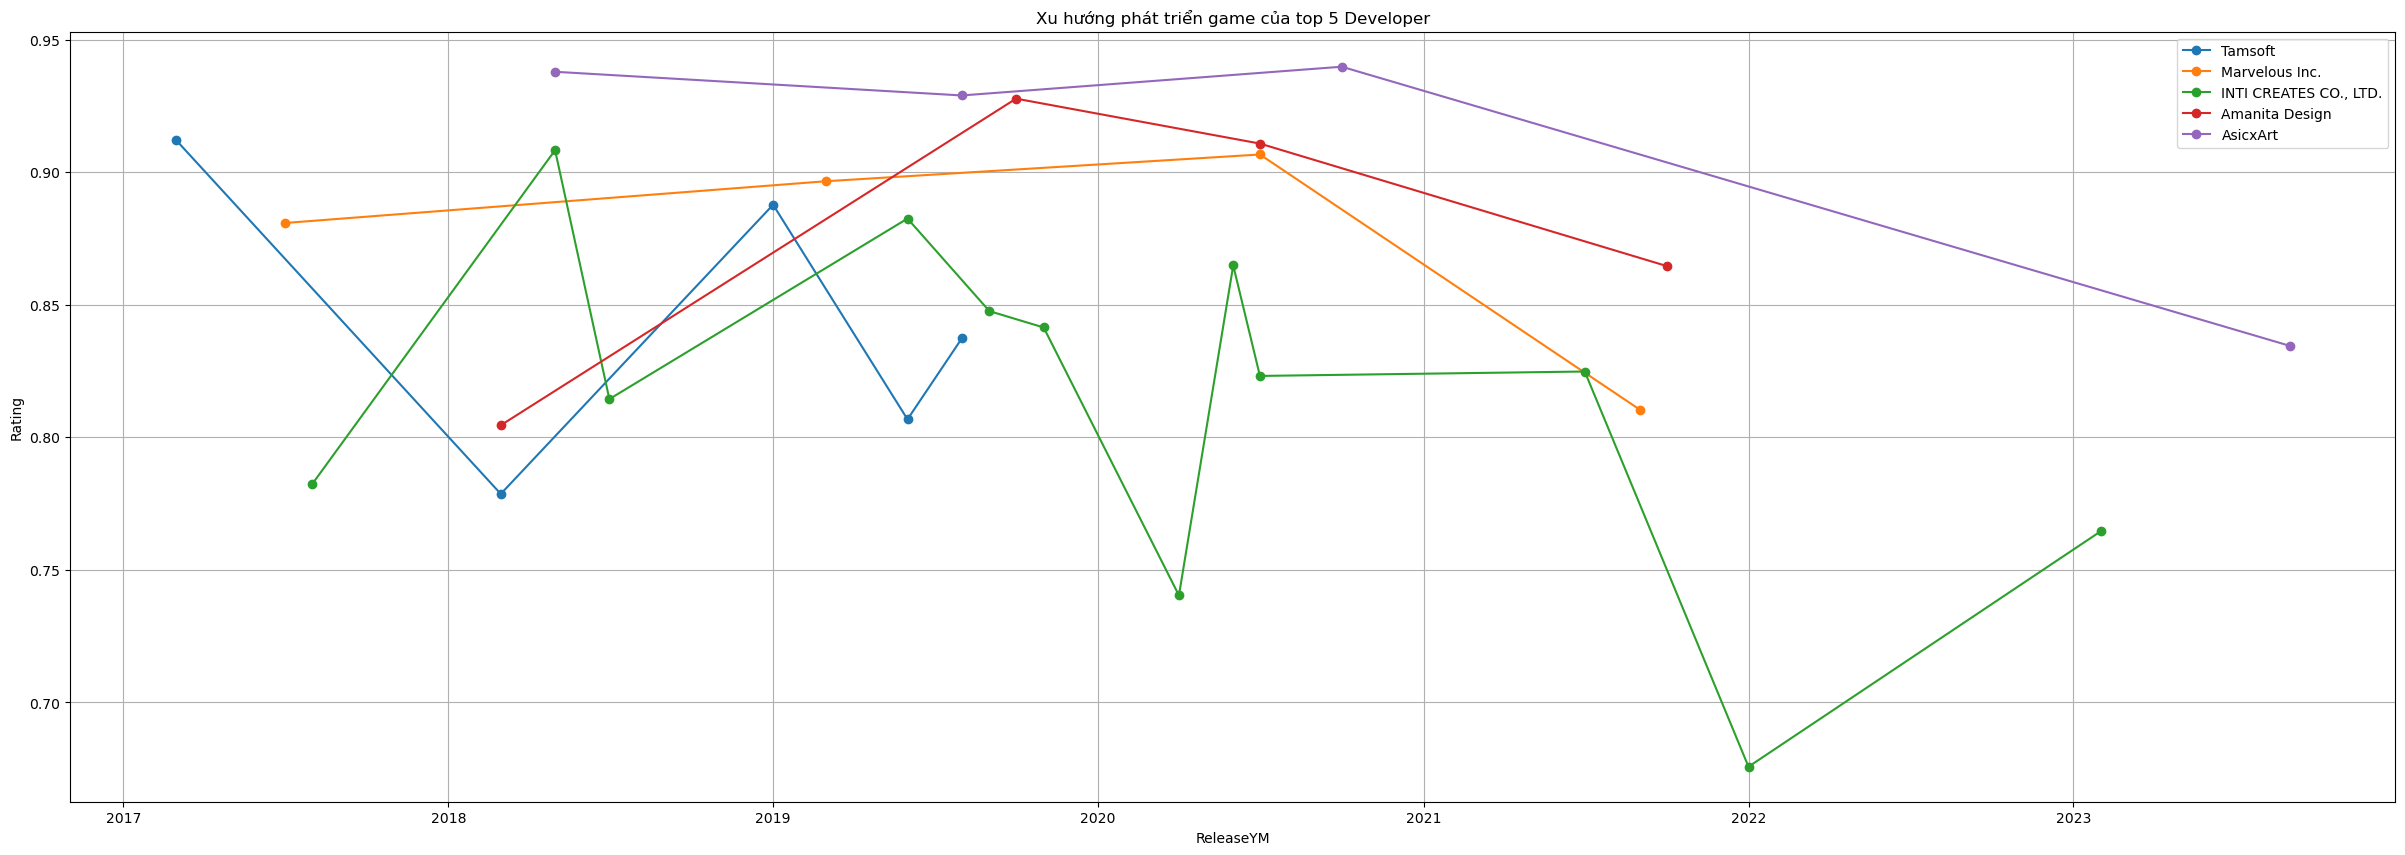

In [17]:
# List 10 developer's names
developer_names = list(top5_dev_df['Developer'].unique())
developer_names

list_date = top5_dev_df['ReleaseYM'].sort_values().unique()
list_date
# Convert list_date to DataFrame
list_date_df = pd.DataFrame(list_date, columns=['ReleaseYM'])

# Plot chart
plt.figure(figsize=(30,10))

for i in range(5):
    dev_df = grouped_df.get_group(developer_names[i]).sort_values(by=['ReleaseYM'])
    
    # Merge list_date_df and dev_df
    merged_df = pd.merge(list_date_df, dev_df, on='ReleaseYM', how='left')

    # Fill missing values with None
    merged_df['Rating'].fillna(value=np.nan, inplace=True)

    # Ensure 'ReleaseYM' is in datetime format
    merged_df['ReleaseYM'] = pd.to_datetime(merged_df['ReleaseYM'])

    mask = np.isfinite(merged_df['Rating'])
    plt.plot(merged_df['ReleaseYM'][mask], merged_df['Rating'][mask], linestyle='-', marker='o', label=developer_names[i])

plt.title("Xu hướng phát triển game của top 5 Developer")
plt.xlabel("ReleaseYM")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

**Nhận xét**:
- Nhìn chung các game của top 5 Developer không có xu hướng phát triển ổn định (lúc cao lúc thấp), tuy nhiên rating đều trên 0.6 - một mức khá.
- 

### Câu hỏi 2: 